<a href="https://colab.research.google.com/github/juju-heo/dataStructure/blob/main/myFirstBrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#필요 모듈들
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#hyperparameters
EPOCHS = 1000 #횟수
LEARNING_RATE = 0.0002 #학습률
TEST_SIZE = 0.3
DROPOUT = 0.2
BATCH_SIZE = 11 # 데이터 batch개당 한 묶음으로 읽어들임(메모리 제한 때문에 사용)

#normalization
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("data.csv", encoding="utf-8") #csv파일을 pandas로 읽어와서 저장
scores = df.iloc[:,:-1].values #data와label로 나누자
print(scores)
scaler_score = MinMaxScaler()
scores = scaler_score.fit_transform(scores)
print(scores)

labels = df.iloc[:,-1].values
print(labels)
scaler_label = MinMaxScaler()
labels = scaler_label.fit_transform(labels.reshape(-1, 1))
print(labels)

#reverse
print(scaler_score.inverse_transform(scores))
print(scaler_label.inverse_transform(labels))
scores = torch.tensor(scores, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32)


'''
#onehot
gender_classes = ["m", "f", "u"]
num_gender_class = len(gender_classes) #3
class_to_index = {c: idx for idx, c in enumerate(gender_classes)}
genders = df.iloc[:,0].values
gender_onehot = torch.eye(num_gender_class)[[class_to_index[c] for c in genders]]
print(genders)
print(gender_onehot)

blood_classes = ["a", "b", "ab", "o"]
num_blood_class = len(blood_classes) #4
blood_class_to_index = {c: idx for idx, c in enumerate(blood_classes)}
bloods = df.iloc[:,1].values
blood_onehot = torch.eye(num_blood_class)[[blood_class_to_index[c] for c in bloods]]

inputs = torch.cat([gender_onehot, blood_onehot, scores], dim=1)
'''

#입력 데이터
dataset = TensorDataset(scores, labels)
train_size = int(len(dataset) * (1-TEST_SIZE))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_dataloader = DataLoader(dataset = train_dataset, batch_size=BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(dataset = test_dataset, batch_size=BATCH_SIZE, shuffle = True)

print(scores)
print(labels)

[[3 4 5]
 [5 3 1]
 [4 5 1]
 [1 1 5]
 [2 2 4]
 [5 4 2]
 [4 4 2]
 [1 1 1]
 [3 2 1]
 [2 3 1]
 [2 2 2]]
[[0.5  0.75 1.  ]
 [1.   0.5  0.  ]
 [0.75 1.   0.  ]
 [0.   0.   1.  ]
 [0.25 0.25 0.75]
 [1.   0.75 0.25]
 [0.75 0.75 0.25]
 [0.   0.   0.  ]
 [0.5  0.25 0.  ]
 [0.25 0.5  0.  ]
 [0.25 0.25 0.25]]
[60 85 79 70 75 80 81 95 91 88 86]
[[0.        ]
 [0.71428571]
 [0.54285714]
 [0.28571429]
 [0.42857143]
 [0.57142857]
 [0.6       ]
 [1.        ]
 [0.88571429]
 [0.8       ]
 [0.74285714]]
[[3. 4. 5.]
 [5. 3. 1.]
 [4. 5. 1.]
 [1. 1. 5.]
 [2. 2. 4.]
 [5. 4. 2.]
 [4. 4. 2.]
 [1. 1. 1.]
 [3. 2. 1.]
 [2. 3. 1.]
 [2. 2. 2.]]
[[60.]
 [85.]
 [79.]
 [70.]
 [75.]
 [80.]
 [81.]
 [95.]
 [91.]
 [88.]
 [86.]]
tensor([[0.5000, 0.7500, 1.0000],
        [1.0000, 0.5000, 0.0000],
        [0.7500, 1.0000, 0.0000],
        [0.0000, 0.0000, 1.0000],
        [0.2500, 0.2500, 0.7500],
        [1.0000, 0.7500, 0.2500],
        [0.7500, 0.7500, 0.2500],
        [0.0000, 0.0000, 0.0000],
        [0.5000, 0.2500, 0.0

In [12]:
class FirstBrain(nn.Module):
  def __init__(self): #뇌의 형태 만들자
    super().__init__()
    #뇌의 모양을 결정하는 코드(뇌 만들기)
    self.hidden_1 = nn.Linear(3, 20)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=DROPOUT)
    self.hidden_2 = nn.Linear(20, 40)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=DROPOUT)
    self.hidden_3 = nn.Linear(40, 40)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=DROPOUT)
    self.hidden_4 = nn.Linear(40, 1)

  def forward(self, x): #입력 값을 받아서 첫번째, 두 번째 hidden layer 지나가기(신경 연결)
    x = self.hidden_1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.hidden_2(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.hidden_3(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.hidden_4(x)
    return x

model = FirstBrain()

In [13]:
loss_function = nn.MSELoss() #대표적인 손실함수 쓰겠다
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) #채점은 Adam optimizer쓰겠다

#train
losses = []
for epoch in range(EPOCHS+1): #epoch은 학습 판수?
  model.train()
  for batch_x, batch_y in train_dataloader:
    prediction = model(batch_x)
    loss = loss_function(prediction, batch_y.unsqueeze(1))
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([7, 1, 1])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


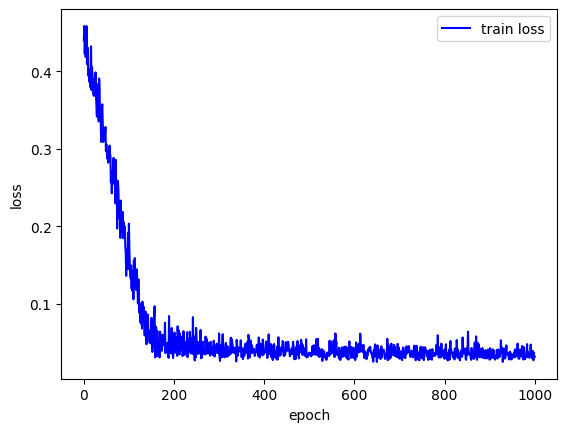

예측값:  [[84.33817]
 [83.43906]]


In [14]:
#plot
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.array([loss.detach().numpy() for loss in losses]), label = "train loss", color = "blue")
plt.legend()
plt.show()

#test
for epoch in range(EPOCHS+1):
  model.eval()
  with torch.no_grad():
    for batch_x, batch_y in test_dataloader:
      prediction = model(batch_x)
      loss = loss_function(prediction, batch_y)

# 예측
test_data = torch.Tensor([[3, 4, 5], [3, 3, 1]])

# 1. 정규화
test_data = torch.tensor(scaler_score.transform(test_data), dtype=torch.float32)

# 2. 예측 (정규화된 결과)
prediction_normalization = model(test_data)

# 3. 역정규화 (NumPy로 바꿔서 넣어야 함)
prediction_original = scaler_label.inverse_transform(prediction_normalization.detach().numpy())

print("예측값: ", prediction_original)